# Q11 By M Sahil

You have been provided with a dataset of 300 places collected by a taxi company. Each location is associated with a two-dimensional point that represents longitude and latitude. For example, ‘-112.1, 33.5’ means the longitude is -112.1 and the latitude is 33.5.

Using the pairs of latitude and longitude, find location clusters, using k-means clustering, Agglomerative clustering, DBSCAN clustering, and Gaussian Mixture Model.
Using genetic and simulated annealing algorithms, find the shortest path between places within cluster from 1 (choose the cluster algorithm with the highest Silhouette score).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

%matplotlib inline 

In [2]:
# Import data loads and displays our summary statistics of our data
df = pd.read_csv('places.csv')
df.head()

,Unnamed: 0,longitude,latitude
0,0,-112.070792,33.451625
1,1,-112.065542,33.449298
2,2,-112.073931,33.456491
3,3,-112.074866,33.470115
4,4,-80.525690,43.477099


In [3]:
ms_df = df[['longitude','latitude']]
ms_df.head()

,longitude,latitude
0,-112.070792,33.451625
1,-112.065542,33.449298
2,-112.073931,33.456491
3,-112.074866,33.470115
4,-80.525690,43.477099


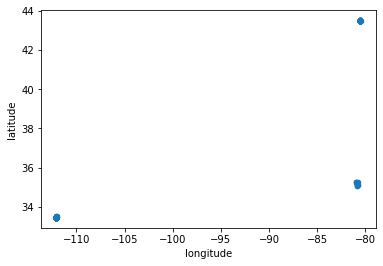

In [4]:
# plots our data
msplot = ms_df.plot.scatter(x='longitude',y='latitude')
msplot.set_xlabel("longitude")
msplot.set_ylabel("latitude")
plt.show()

In [5]:
# scales our data
preprocessor = preprocessing.StandardScaler().fit(ms_df)
ms_df_transforemd = preprocessor.transform(ms_df)

In [6]:
scaled_df = pd.DataFrame(ms_df_transforemd,  columns = ms_df.columns)

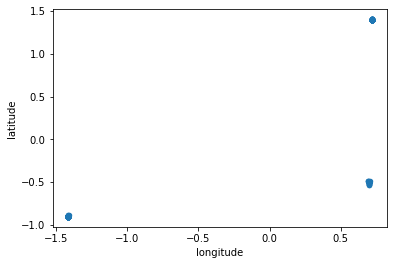

In [7]:
# plots our data
msplot = scaled_df.plot.scatter(x='longitude',y='latitude')
msplot.set_xlabel("longitude")
msplot.set_ylabel("latitude")
plt.show()

In [8]:
#Clustering Algorithms

In [9]:
from sklearn.cluster import KMeans
wss = []
inti_K = 5
End_K = 11
for i in range(inti_K,End_K):
    fitx = KMeans(n_clusters=i, n_init=5, random_state=109).fit(scaled_df)
    wss.append(fitx.inertia_)

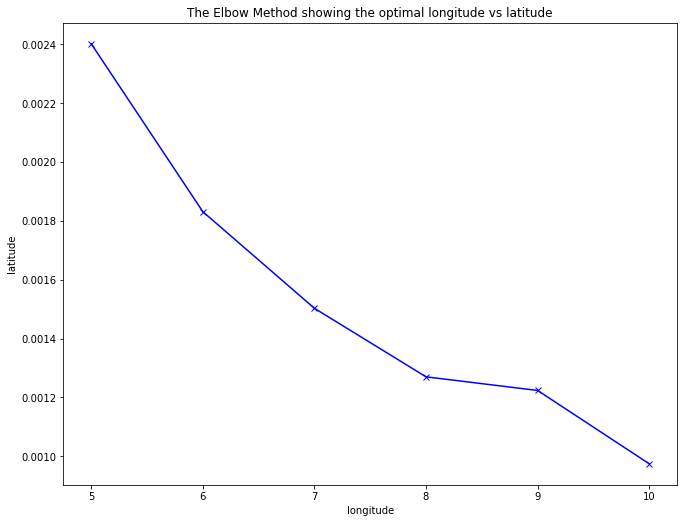

In [10]:
plt.figure(figsize=(11,8.5))
plt.plot(range(inti_K,End_K), wss, 'bx-')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('The Elbow Method showing the optimal longitude vs latitude')
plt.show()

In [11]:
from kneed import KneeLocator
kl = KneeLocator(
    range(inti_K, End_K), wss, curve="convex", direction="decreasing")
kl.elbow

7

In [12]:
kl.elbow

7

In [13]:
# from sklearn.cluster import KMeans
ms_kmeans = KMeans(n_clusters=kl.elbow, random_state=109, verbose=1).fit(scaled_df)

Initialization complete
Iteration 0, inertia 0.002018296687914807
Converged at iteration 0: center shift 1.3359649637788756e-05 within tolerance 9.999999999999998e-05.
Initialization complete
Iteration 0, inertia 0.002093066967284022
Converged at iteration 0: center shift 2.6393086710970953e-05 within tolerance 9.999999999999998e-05.
Initialization complete
Iteration 0, inertia 0.0023390154871587997
Converged at iteration 0: center shift 2.754886303405119e-05 within tolerance 9.999999999999998e-05.
Initialization complete
Iteration 0, inertia 0.0019184226932213136
Converged at iteration 0: center shift 1.570329578776499e-05 within tolerance 9.999999999999998e-05.
Initialization complete
Iteration 0, inertia 0.0017844835462918303
Converged at iteration 0: center shift 1.3584535267403213e-05 within tolerance 9.999999999999998e-05.
Initialization complete
Iteration 0, inertia 0.00240790302954928
Converged at iteration 0: center shift 2.266982355726131e-05 within tolerance 9.99999999999999

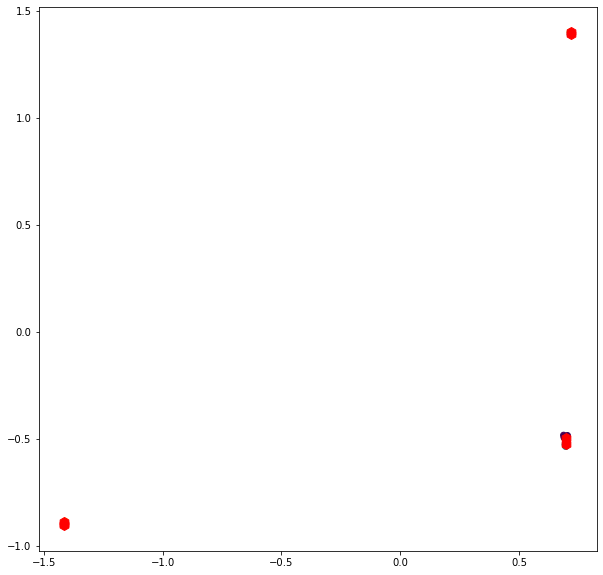

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(scaled_df['longitude'],scaled_df['latitude'], c=ms_kmeans.labels_);
plt.scatter(ms_kmeans.cluster_centers_[:,0],ms_kmeans.cluster_centers_[:,1], c='r', marker='h', s=100);

In [15]:
ms_kmeans.labels_

array([4, 4, 4, 1, 2, 5, 0, 4, 4, 0, 4, 0, 2, 1, 0, 0, 0, 1, 0, 2, 5, 2,
       5, 0, 4, 2, 4, 2, 1, 1, 5, 0, 4, 4, 1, 0, 2, 4, 2, 0, 0, 0, 0, 0,
       0, 2, 1, 0, 4, 1, 2, 0, 4, 3, 2, 0, 1, 3, 2, 0, 4, 2, 0, 1, 2, 0,
       0, 4, 2, 0, 2, 4, 0, 2, 1, 1, 4, 0, 2, 4, 1, 0, 1, 2, 4, 6, 2, 4,
       2, 4, 2, 2, 4, 5, 2, 5, 0, 0, 6, 4, 4, 2, 4, 4, 0, 0, 4, 2, 4, 4,
       2, 0, 1, 2, 4, 4, 2, 4, 2, 2, 0, 0, 1, 2, 3, 2, 0, 2, 0, 2, 0, 5,
       0, 4, 4, 2, 2, 4, 1, 2, 0, 0, 4, 2, 0, 0, 0, 1, 0, 3, 2, 0, 0, 2,
       2, 2, 2, 2, 3, 3, 5, 1, 5, 4, 0, 5, 2, 2, 2, 5, 2, 4, 1, 0, 0, 4,
       2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 2, 4, 2, 0, 0, 1, 4, 1, 0, 1, 4,
       0, 1, 2, 1, 0, 1, 2, 0, 1, 5, 0, 0, 2, 0, 0, 4, 2, 2, 1, 2, 1, 2,
       1, 2, 2, 2, 0, 0, 0, 4, 3, 1, 4, 0, 0, 2, 5, 0, 4, 0, 4, 0, 1, 4,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 2, 2, 2, 2, 0, 4, 0, 1, 2, 4, 0, 5,
       2, 6, 2, 4, 2, 4, 5, 0, 4, 0, 2, 2, 4, 4, 2, 2, 0, 0, 0, 0, 2, 2,
       0, 5, 2, 1, 5, 1, 3, 1, 2, 1, 1, 1, 2, 1])

In [16]:
#2a.4 Quality of Clusters: Silhouette
from sklearn.metrics import silhouette_score
silhouette_score(scaled_df, ms_kmeans.labels_)

0.7564842865710766

In [17]:
# Check with more k
from sklearn.metrics import silhouette_score
inti_K = 5
End_K = 10
scores = [0]
for i in range(inti_K+1,End_K):
    fitx = KMeans(n_clusters=i, n_init=5, random_state=109).fit(scaled_df)
    score = silhouette_score(scaled_df, fitx.labels_)
    scores.append(score)

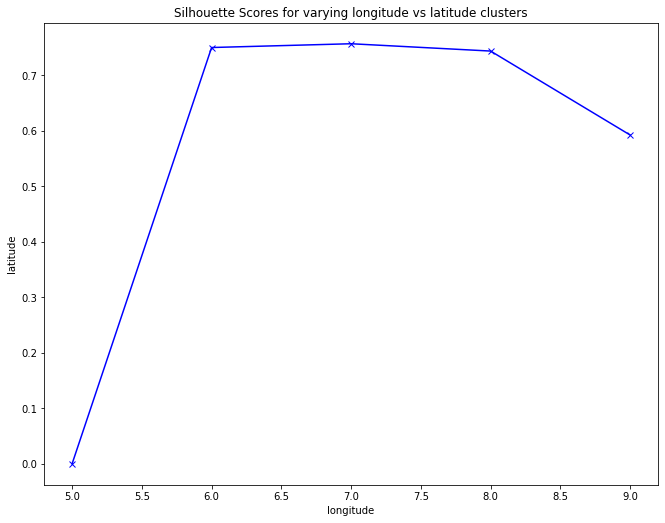

In [18]:
plt.figure(figsize=(11,8.5))
plt.plot(range(inti_K,End_K), np.array(scores), 'bx-')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Silhouette Scores for varying longitude vs latitude clusters')
plt.show()

In [19]:
#3b. Agglomerative Clustering
#3b.1 Code (via scipy):

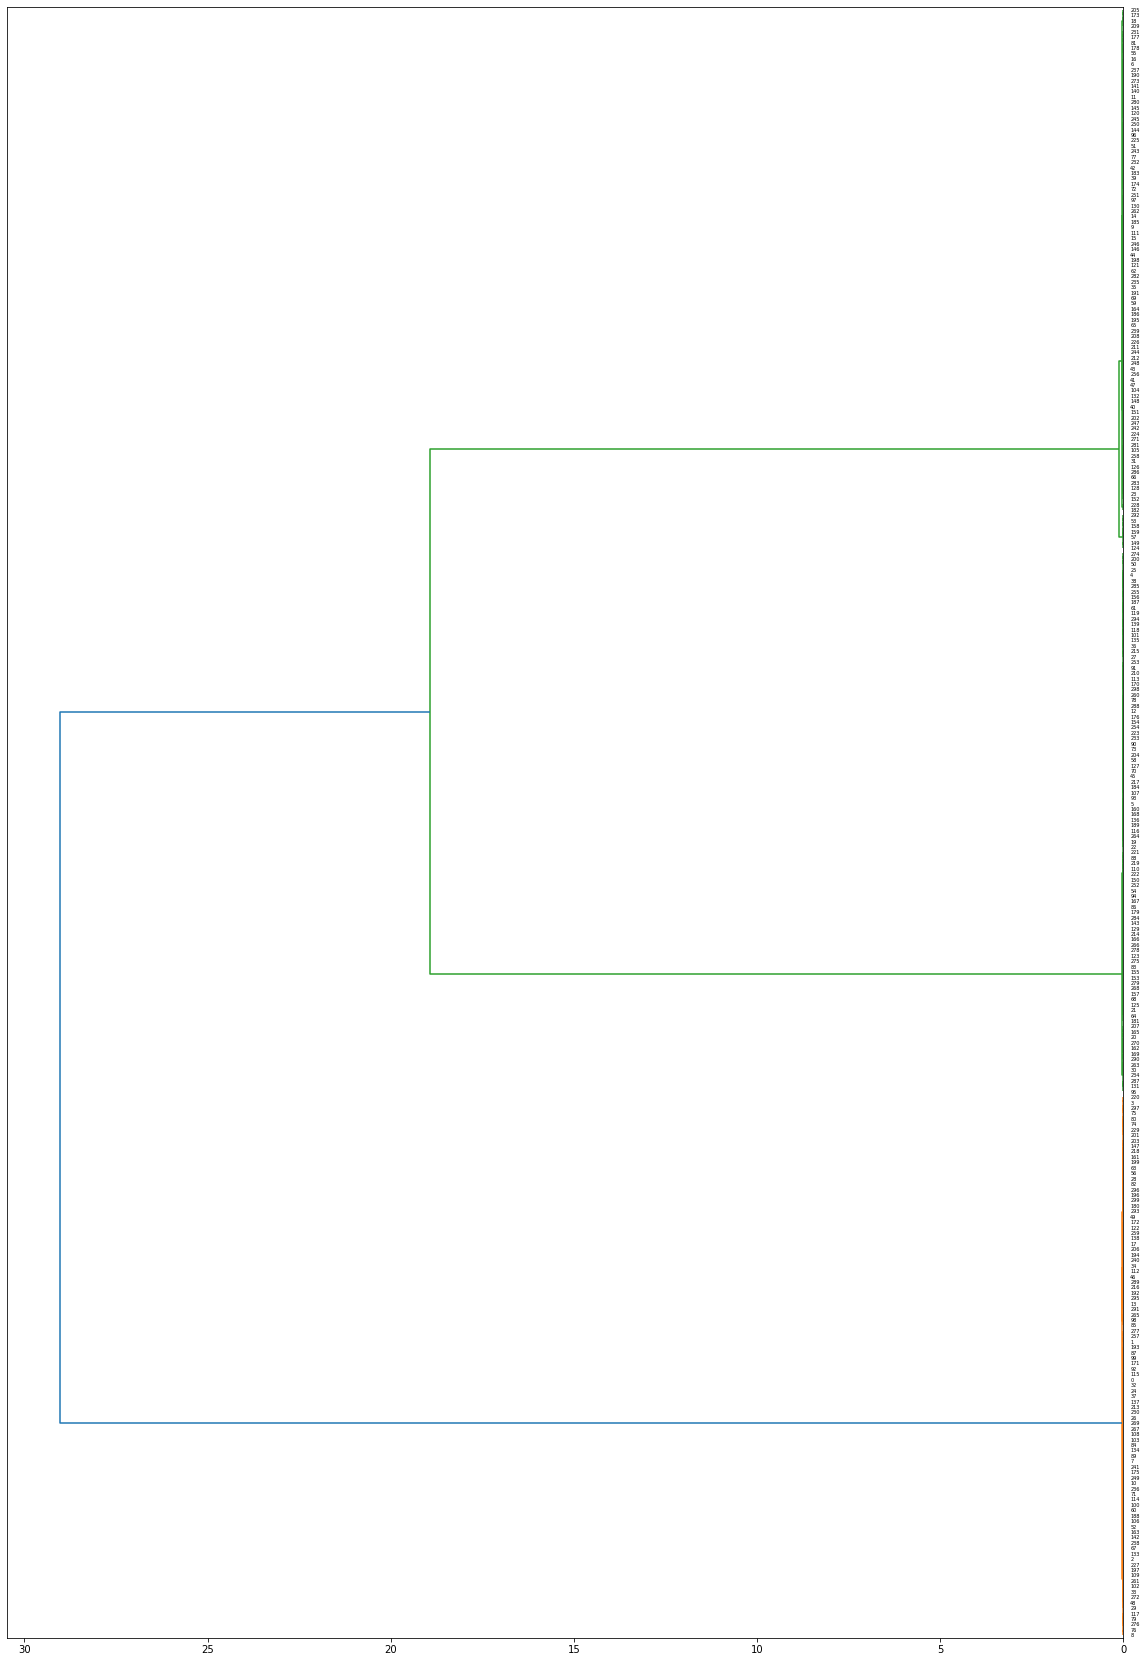

In [20]:
import scipy.cluster.hierarchy as hac
from scipy.spatial.distance import pdist

plt.figure(figsize=(20,30))
dist_mat = pdist(scaled_df, metric="euclidean")
ward_data = hac.ward(dist_mat)
hac.dendrogram(ward_data, orientation='left', leaf_font_size=5);

In [21]:
from sklearn.cluster import AgglomerativeClustering

Agglomerativecluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
Agglomerativecluster.fit_predict(scaled_df)

array([4, 4, 4, 2, 0, 0, 1, 4, 4, 1, 4, 1, 0, 2, 1, 1, 1, 2, 1, 0, 0, 0,
       0, 1, 4, 0, 4, 0, 2, 4, 0, 1, 4, 4, 2, 1, 0, 4, 0, 1, 1, 1, 1, 1,
       1, 0, 2, 1, 4, 2, 0, 1, 4, 3, 0, 1, 2, 3, 0, 1, 4, 0, 1, 2, 0, 1,
       1, 4, 0, 1, 0, 4, 1, 0, 2, 2, 4, 1, 0, 4, 2, 1, 2, 0, 4, 2, 0, 4,
       0, 4, 0, 0, 4, 0, 0, 0, 1, 1, 2, 4, 4, 0, 4, 4, 1, 1, 4, 0, 4, 4,
       0, 1, 2, 0, 4, 4, 0, 4, 0, 0, 1, 1, 2, 0, 3, 0, 1, 0, 1, 0, 1, 0,
       1, 4, 4, 0, 0, 4, 2, 0, 1, 1, 4, 0, 1, 1, 1, 2, 1, 3, 0, 1, 1, 0,
       0, 0, 0, 0, 3, 3, 0, 2, 0, 4, 1, 0, 0, 0, 0, 0, 0, 4, 2, 1, 1, 4,
       0, 1, 1, 0, 2, 0, 1, 1, 0, 1, 1, 0, 4, 0, 1, 1, 2, 4, 2, 1, 2, 4,
       1, 2, 0, 2, 1, 2, 0, 1, 2, 0, 1, 1, 0, 1, 1, 4, 0, 0, 2, 0, 2, 0,
       2, 0, 0, 0, 1, 1, 1, 4, 1, 2, 4, 1, 1, 0, 0, 1, 4, 1, 4, 1, 2, 4,
       1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 0, 0, 0, 0, 1, 4, 1, 2, 0, 4, 1, 0,
       0, 2, 0, 4, 0, 4, 0, 1, 4, 1, 0, 0, 4, 4, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 2, 0, 2, 3, 2, 0, 2, 2, 2, 0, 2], d

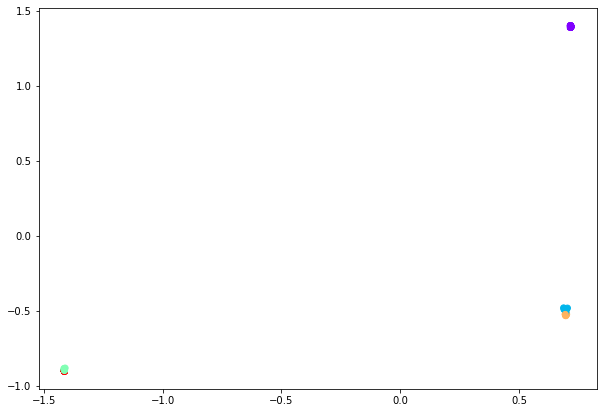

In [22]:
plt.figure(figsize=(10, 7))
data = scaled_df.values
plt.scatter(data[:,0], data[:,1], c=Agglomerativecluster.labels_, cmap='rainbow')

In [23]:
#3b.2 Quality of Clusters: Silhouette
silhouette_score(scaled_df, Agglomerativecluster.labels_)

0.8476044172896635

In [24]:
#3c. DBscan Clustering
from sklearn.cluster import DBSCAN
fitted_dbscan = DBSCAN(eps=0.4).fit(scaled_df)

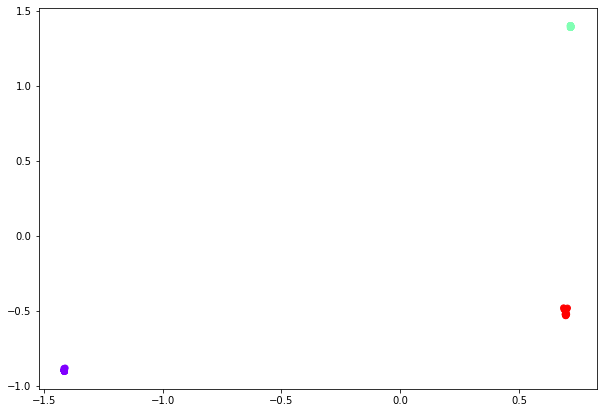

In [25]:
plt.figure(figsize=(10, 7))
data = scaled_df.values
plt.scatter(data[:,0], data[:,1], c=fitted_dbscan.labels_, cmap='rainbow')

In [26]:
silhouette_score(scaled_df, fitted_dbscan.labels_)

0.9977041776728723

In [27]:
fitted_dbscan.labels_

array([0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 0, 2, 1, 0, 2, 2, 2, 0, 2, 1, 1, 1,
       1, 2, 0, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2, 1, 0, 1, 2, 2, 2, 2, 2,
       2, 1, 0, 2, 0, 0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 1, 2, 0, 1, 2,
       2, 0, 1, 2, 1, 0, 2, 1, 0, 0, 0, 2, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 2, 2, 0, 0, 0, 1, 0, 0, 2, 2, 0, 1, 0, 0,
       1, 2, 0, 1, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 2, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 0,
       1, 2, 2, 1, 0, 1, 2, 2, 1, 2, 2, 1, 0, 1, 2, 2, 0, 0, 0, 2, 0, 0,
       2, 0, 1, 0, 2, 0, 1, 2, 0, 1, 2, 2, 1, 2, 2, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 2, 2, 2, 0, 2, 0, 0, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 2, 0, 2, 0, 1, 0, 2, 1,
       1, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1,
       2, 1, 1, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0], d

In [28]:
testdf = ms_df.copy()

In [29]:
testdf['cluster_label'] = fitted_dbscan.labels_

In [30]:
testdf.head(20)

,longitude,latitude,cluster_label
0,-112.070792,33.451625,0
1,-112.065542,33.449298,0
2,-112.073931,33.456491,0
3,-112.074866,33.470115,0
4,-80.525690,43.477099,1
5,-80.526641,43.485875,1
6,-80.846495,35.225825,2
7,-112.074428,33.448491,0
8,-112.073101,33.429907,0
9,-80.839636,35.227054,2


In [31]:
#To compare how close two classes or clutsers close to each others
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(ms_kmeans.labels_, Agglomerativecluster.labels_)

0.9174872729574747

In [32]:
#Pipeline
from sklearn.pipeline import Pipeline

In [33]:
# Pipeline
pipeLine = Pipeline([('Scaler_Input',preprocessor), ('Cluster', ms_kmeans)])
pipeLine.fit(ms_df)

Initialization complete
Iteration 0, inertia 0.002018296687914807
Converged at iteration 0: center shift 1.3359649637788756e-05 within tolerance 9.999999999999998e-05.
Initialization complete
Iteration 0, inertia 0.002093066967284022
Converged at iteration 0: center shift 2.6393086710970953e-05 within tolerance 9.999999999999998e-05.
Initialization complete
Iteration 0, inertia 0.0023390154871587997
Converged at iteration 0: center shift 2.754886303405119e-05 within tolerance 9.999999999999998e-05.
Initialization complete
Iteration 0, inertia 0.0019184226932213136
Converged at iteration 0: center shift 1.570329578776499e-05 within tolerance 9.999999999999998e-05.
Initialization complete
Iteration 0, inertia 0.0017844835462918303
Converged at iteration 0: center shift 1.3584535267403213e-05 within tolerance 9.999999999999998e-05.
Initialization complete
Iteration 0, inertia 0.00240790302954928
Converged at iteration 0: center shift 2.266982355726131e-05 within tolerance 9.99999999999999

Pipeline(steps=[('Scaler_Input', StandardScaler()),
                ('Cluster', KMeans(n_clusters=7, random_state=109, verbose=1))])

In [34]:
# Predict using pipeline
pipeLine.predict(ms_df)

array([4, 4, 4, 1, 2, 5, 0, 4, 4, 0, 4, 0, 2, 1, 0, 0, 0, 1, 0, 2, 5, 2,
       5, 0, 4, 2, 4, 2, 1, 1, 5, 0, 4, 4, 1, 0, 2, 4, 2, 0, 0, 0, 0, 0,
       0, 2, 1, 0, 4, 1, 2, 0, 4, 3, 2, 0, 1, 3, 2, 0, 4, 2, 0, 1, 2, 0,
       0, 4, 2, 0, 2, 4, 0, 2, 1, 1, 4, 0, 2, 4, 1, 0, 1, 2, 4, 6, 2, 4,
       2, 4, 2, 2, 4, 5, 2, 5, 0, 0, 6, 4, 4, 2, 4, 4, 0, 0, 4, 2, 4, 4,
       2, 0, 1, 2, 4, 4, 2, 4, 2, 2, 0, 0, 1, 2, 3, 2, 0, 2, 0, 2, 0, 5,
       0, 4, 4, 2, 2, 4, 1, 2, 0, 0, 4, 2, 0, 0, 0, 1, 0, 3, 2, 0, 0, 2,
       2, 2, 2, 2, 3, 3, 5, 1, 5, 4, 0, 5, 2, 2, 2, 5, 2, 4, 1, 0, 0, 4,
       2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 2, 4, 2, 0, 0, 1, 4, 1, 0, 1, 4,
       0, 1, 2, 1, 0, 1, 2, 0, 1, 5, 0, 0, 2, 0, 0, 4, 2, 2, 1, 2, 1, 2,
       1, 2, 2, 2, 0, 0, 0, 4, 3, 1, 4, 0, 0, 2, 5, 0, 4, 0, 4, 0, 1, 4,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 2, 2, 2, 2, 0, 4, 0, 1, 2, 4, 0, 5,
       2, 6, 2, 4, 2, 4, 5, 0, 4, 0, 2, 2, 4, 4, 2, 2, 0, 0, 0, 0, 2, 2,
       0, 5, 2, 1, 5, 1, 3, 1, 2, 1, 1, 1, 2, 1])

In [35]:
#Predict claster giving new dataset
d = {'longitude':[-80,112], 'latitude' : [33,43]}
df_new = pd.DataFrame(data=d)

In [36]:
df_new

,longitude,latitude
0,-80,33
1,112,43


In [37]:
# Predict using pipeline
pipeLine.predict(df_new)

array([3, 2])

In [38]:

df_new_scaled = preprocessor.transform(df_new)
ms_kmeans.predict(df_new_scaled)

array([3, 2])

In [39]:
ms_df['cluster_label'] = pipeLine.fit_predict(ms_df)

Initialization complete
Iteration 0, inertia 0.002018296687914807
Converged at iteration 0: center shift 1.3359649637788756e-05 within tolerance 9.999999999999998e-05.
Initialization complete
Iteration 0, inertia 0.002093066967284022
Converged at iteration 0: center shift 2.6393086710970953e-05 within tolerance 9.999999999999998e-05.
Initialization complete
Iteration 0, inertia 0.0023390154871587997
Converged at iteration 0: center shift 2.754886303405119e-05 within tolerance 9.999999999999998e-05.
Initialization complete
Iteration 0, inertia 0.0019184226932213136
Converged at iteration 0: center shift 1.570329578776499e-05 within tolerance 9.999999999999998e-05.
Initialization complete
Iteration 0, inertia 0.0017844835462918303
Converged at iteration 0: center shift 1.3584535267403213e-05 within tolerance 9.999999999999998e-05.
Initialization complete
Iteration 0, inertia 0.00240790302954928
Converged at iteration 0: center shift 2.266982355726131e-05 within tolerance 9.99999999999999

In [40]:
ms_df.head()

,longitude,latitude,cluster_label
0,-112.070792,33.451625,4
1,-112.065542,33.449298,4
2,-112.073931,33.456491,4
3,-112.074866,33.470115,1
4,-80.525690,43.477099,2


In [41]:
print("There are 100 locations in each cluster")
ms_df['cluster_label'].value_counts()

There are 100 locations in each cluster


0    92
2    83
4    56
1    41
5    17
3     8
6     3
Name: cluster_label, dtype: int64

In [42]:
clusters = ms_df['cluster_label'].unique()
clusters

array([4, 1, 2, 5, 0, 3, 6])

In [43]:

clusters[0]

4

In [44]:

cluster = clusters[0]
num_points = len(ms_df[ms_df['cluster_label'] == cluster])
num_points

56

In [45]:
points_coordinate = ms_df[ms_df['cluster_label'] == cluster][['longitude','latitude']]

In [46]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
import math



distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')


def cal_total_distance(routine):
    '''The objective function. input routine, return total distance.
    cal_total_distance(np.arange(num_points))
    '''
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])

In [47]:
#1. Genetic Algorithm for TSP

from sko.GA import GA_TSP

ga_tsp = GA_TSP(func=cal_total_distance, n_dim=num_points, size_pop=50, max_iter=500, prob_mut=1)
best_points, best_distance = ga_tsp.run()

In [48]:
best_points

array([18, 25, 33, 29, 48,  5,  3, 47, 20, 38, 27, 50, 43, 41,  2, 32, 53,
       11, 28, 24,  9,  7, 34, 10, 44,  6,  8, 49, 55, 30, 42,  0, 21, 37,
       22, 40, 19, 51, 45, 15, 36, 46, 35, 14,  1, 12, 31, 17, 16,  4, 54,
       39, 26, 23, 13, 52], dtype=int64)

In [49]:
best_distance

array([0.12587507])

In [50]:
#2. Simulated Annealing (SA) for TSP

from sko.SA import SA_TSP

sa_tsp = SA_TSP(func=cal_total_distance, x0=range(num_points), T_max=500, T_min=0.1)

best_points, best_distance = sa_tsp.run()

In [51]:
best_points

array([37,  0, 21, 24, 53, 50,  2, 49, 34, 20, 29, 11, 10,  5, 39, 28, 18,
        7, 30, 19, 44, 14, 46, 45, 15, 13, 47, 51,  4, 31,  1, 55,  6, 40,
       33, 36, 22, 25, 52, 27, 54, 17, 16, 23,  8, 35, 38,  3, 43, 41, 32,
       42, 26, 12,  9, 48])

In [52]:
# to start with the cluster 1
cluster = clusters[1]
print('for cluster number ', cluster)
num_points = len(ms_df[ms_df['cluster_label'] == cluster])
print('num_points = ',num_points)
# Genetic Algorithm
print('\n====> Genetic Algorithm')
ga_tsp = GA_TSP(func=cal_total_distance, n_dim=num_points, size_pop=50, max_iter=500, prob_mut=1)
best_points, best_distance = ga_tsp.run()
print('best_points = ', best_points)
print('best_distance = ',best_distance)
# Simulated Annealing
print('\n====> Simulated Annealing')
sa_tsp = SA_TSP(func=cal_total_distance, x0=range(num_points), T_max=500, T_min=0.1)
best_points, best_distance = sa_tsp.run()
print('best_points = ', best_points)
print('best_distance = ',best_distance)

for cluster number  1
num_points =  41

====> Genetic Algorithm
best_points =  [18 27  3 20 38  5 29 40 19 15 36 35 14 23 26 13 39  4 16 17 31 12  1 21
 37 22  0  7 30  8  6 10 34 28  9 24 11 32  2 33 25]
best_distance =  [0.0960528]

====> Simulated Annealing
best_points =  [ 9 27  3 32  0 37  5 40 21 12 14 16  4 31 17 36  8 23 33 11 18 28 29  1
 25 34 15 39 24 10 19  7 22  6 30 38 20 35 13 26  2]
best_distance =  0.24200690974694603
